## 章節 3：估計 (Estimation)

### 3.2 火車頭問題（The locomotive problem）

作者在 Frederick Mosteller 的 Fifty Challenging Problems in Probability with Solutions (Dover, 1987) 書中看到火車頭問題。

問題如下：

> 鐵路上有數個火車頭按照順序標記數字從1到N。
有一天你看到一個火車頭編號為60。
請估計鐵路上有總共有多少火車頭？

根據觀察，我們知道鐵路上有 60 輛火車頭或更多。但到底多多少呢？

為了套用貝葉斯推理，我們可以將問題拆解成兩個步驟：

1. 在看到資料前，我們對於 N 知道什麼？
2. 對於任何的給定的 N，它看到資料的似然性是多少P(D|H)？(例如火車頭編號為60，)

第一個問題的答案就是先驗分佈。第二個問題的答案就是似然性（Likelihood）函數。

我們沒有太多基礎選擇先驗分佈，但我們可以從一個簡單的開始，之後再考慮**其他的先驗分佈**。

我們假設N從1到1000的機率都是一樣的。所以先驗分佈是一個均勻分布（uniform distribution）。

接下來我門需要似然性函數。假設在一個有N台火車頭的情況下，我們看到編號60的機率是多少？要是我們假設只有一家火車公司（我們也只關心某一家），並且我們看到每台火車頭的機率是一樣的，所以看到任一台火車頭的機率就是 1/N。請參考以下程式碼的 Likelihood 方法。

初始分佈


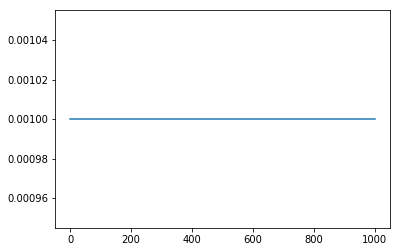

看到編後60後的分佈


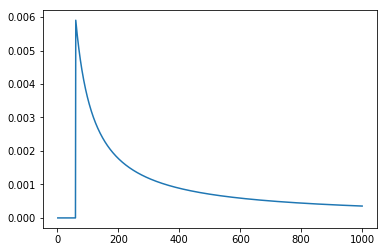

In [20]:
import matplotlib.pyplot as plt
from thinkbayes import Suite

def plot(suite, desc):
    print(desc)
    x, y = zip(*sorted(suite.Items(), key=lambda x: x[0]))
    fig, ax = plt.subplots()
    ax.plot(x, y)
    plt.show()

class Train(Suite):
    
    def Likelihood(self, data, hypo): # 跟 3.1 一樣的 Likelihood 方法
        if data > hypo:
            return 0.0
        
        return 1.0/hypo

hypos = range(1, 1001) # 我們假設N從1到1000的機率都是一樣的。
suite = Train(hypos)
plot(suite, "初始分佈")
suite.Update(60)
plot(suite, "看到編後60後的分佈")

這裡的假設有太多個（1~1000），所以我用畫圖的方式呈現機率分佈。

在看到編號 60 後，不意外的所有N小於60的機率都變成0。目前最有可能的N就是60。這似乎不是一個很好的猜測；畢竟你有多大的機會剛好看到最大的編號？

然而，如果你想最大化猜到正確答案的機率，你應該就猜60。但這或許不是正確的目標。另一個目標是計算後驗分佈的平均(mean)值（或是期望值）。

In [24]:
def mean(suite):
    mean = 0
    for hypo, prob in suite.Items():
        mean += hypo*prob #
        
    return mean


print("平均（期望值）：", mean(suite))

平均（期望值）： 333.41989326371095


平均約為 333 台火車頭。如果你想最小化猜測的誤差，這是一個很好的猜測。

如果你不斷的玩這個火車頭的猜測遊戲，用後驗分佈的平均值當作你的猜測結果將最小化長期的均方誤差（Mean Square Error）。

你可以在此下載作者個程式碼：http://thinkbayes.com/train.py.